In [25]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import pandas as pd

# To make this notebook's output stable across multiple runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [26]:
# To read the data from an Excel file and illustrate the first few rows; 
# Change the location to the Excel file location on your PC!
data = pd.read_excel(r'/Users/jd/Documents/Work/ESTRO/ESTRO 2019/pre-meeting/ESTRO_premeeting_dataset.xlsx',target='LR.1') 
data.head()

,Location_exact,Technique,PTV_V50Gy,PTV_D2%,PTV_D98%,GTV_D2%,GTV_D98%,GTV_D50%,GTV_cc,LR,AP,CC,EUCL,LR.1
0,LBK,Tracking,100.0,64.6,51.3,65.9,57.9,62.5,1.06,1.0,3.0,5.7,6.518435,0
1,RBK,ITV,99.7,65.8,51.6,67.1,60.5,63.5,0.76,-2.0,7.0,6.0,9.433981,0
2,RMK,ITV,99.9,65.9,51.9,67.0,60.3,64.2,2.20,-2.1,1.6,3.3,4.226109,1
3,ROK,ITV,99.4,66.3,51.0,67.0,60.8,64.3,3.70,-0.7,-2.6,7.9,8.346257,0
4,RBK,ITV,100.0,65.1,52.0,65.3,57.5,61.7,1.30,0.5,-1.1,1.4,1.849324,0


In [27]:
# To show some info on the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 14 columns):
Location_exact    109 non-null object
Technique         109 non-null object
PTV_V50Gy         109 non-null float64
PTV_D2%           109 non-null float64
PTV_D98%          109 non-null float64
GTV_D2%           109 non-null float64
GTV_D98%          109 non-null float64
GTV_D50%          109 non-null float64
GTV_cc            109 non-null float64
LR                109 non-null float64
AP                109 non-null float64
CC                109 non-null float64
EUCL              109 non-null float64
LR.1              109 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 12.0+ KB


In [28]:
# To show all possible "Location_exact" categories in the dataset
data["Location_exact"].value_counts()

LBK    36
RBK    21
ROK    21
LOK    20
RMK    11
Name: Location_exact, dtype: int64

In [29]:
# To show number of "LR.1" categories in the dataset
data["LR.1"].value_counts()

0    77
1    32
Name: LR.1, dtype: int64

In [30]:
# To show number of "Technique" categories in the dataset
data["Technique"].value_counts()

ITV         94
Tracking    15
Name: Technique, dtype: int64

In [31]:
# To give some statistics on the numerical features
data.describe()

,PTV_V50Gy,PTV_D2%,PTV_D98%,GTV_D2%,GTV_D98%,GTV_D50%,GTV_cc,LR,AP,CC,EUCL,LR.1
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,98.774587,65.781284,51.757064,66.475321,60.640826,64.188624,4.216156,1.781284,2.610000,7.665688,9.047311,0.293578
std,4.420853,1.933504,1.934911,3.192854,4.173766,2.921886,7.219889,1.976544,2.098946,6.522449,6.134108,0.457504
min,65.760000,54.570000,43.110000,43.120000,31.210000,41.590000,0.100000,-2.800000,-2.600000,0.000000,1.277576,0.000000
25%,99.390000,64.800000,51.130000,65.700000,60.230000,63.850000,0.600000,0.800000,1.100000,3.100000,4.736032,0.000000
50%,99.870000,66.140000,51.820000,67.000000,61.210000,64.550000,1.300000,1.300000,2.300000,5.900000,7.502666,0.000000
75%,99.990000,66.980000,52.590000,67.980000,62.450000,65.240000,3.700000,2.600000,3.400000,11.600000,12.287392,1.000000
max,100.000000,69.000000,56.180000,71.110000,65.580000,67.600000,31.590000,12.000000,9.100000,39.100000,39.141538,1.000000


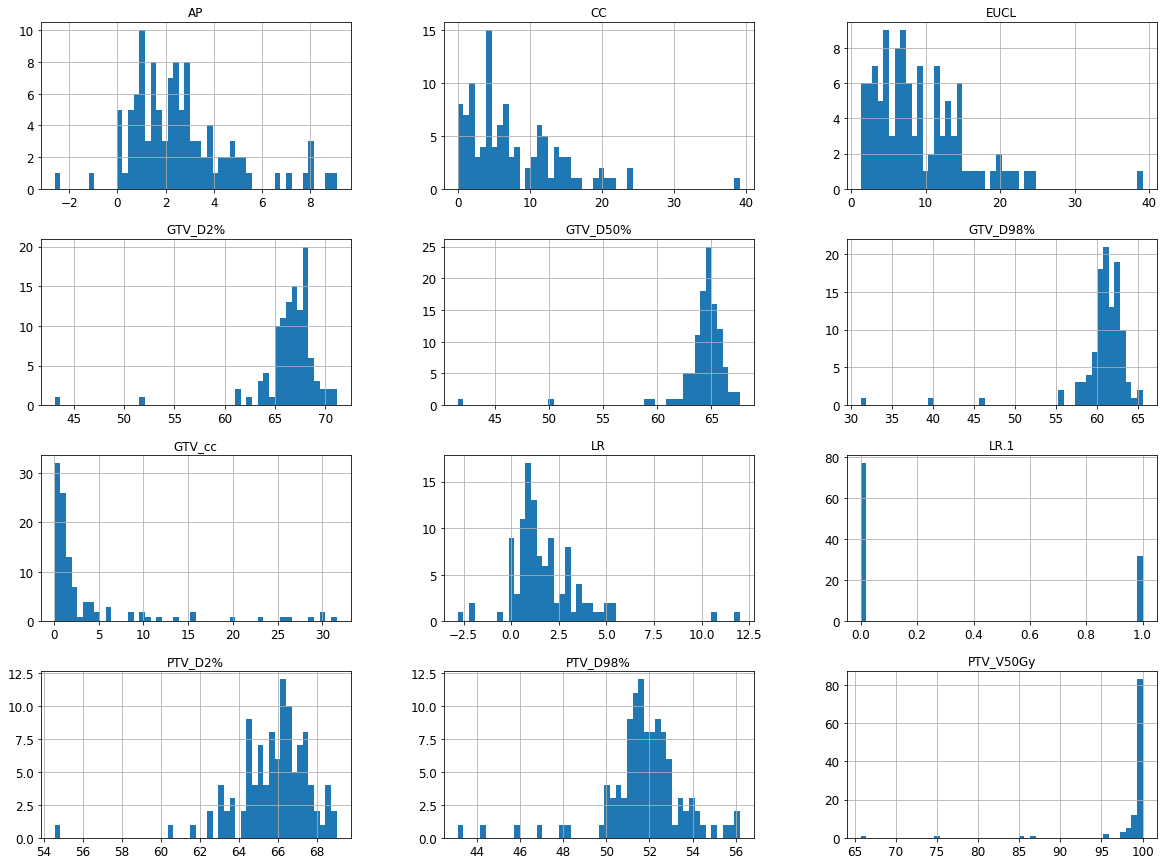

In [32]:
# To plot the histograms of all numerical features
%matplotlib inline
data.hist(bins=50, figsize=(20,15)) 
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117ce5550>,
      dtype=object)

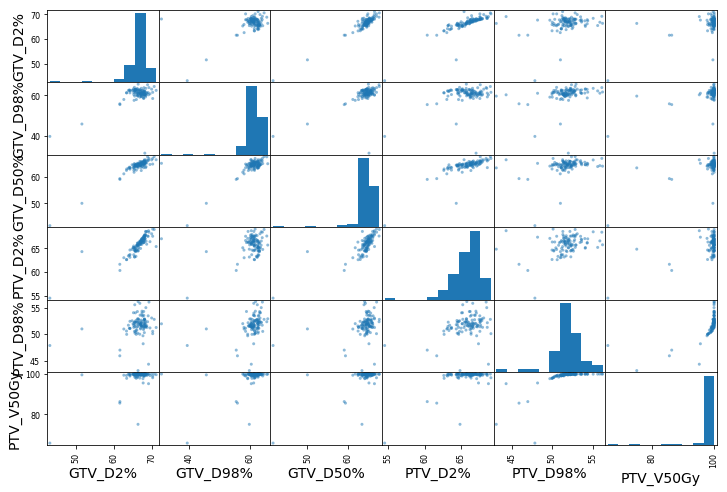

In [33]:
# To visually evaluate inter-feature correlation
from pandas.plotting import scatter_matrix

attributes = ["GTV_D2%", "GTV_D98%","GTV_D50%",
                  "PTV_D2%","PTV_D98%", "PTV_V50Gy"]
scatter_matrix(data[attributes], figsize=(12, 8))

In [34]:
# To read the data from an Excel file with oversampled minority class and illustrate the first few rows; 
# Change the location to the Excel file location on your PC!
data = pd.read_excel(r'/Users/jd/Documents/Work/ESTRO/ESTRO 2019/pre-meeting/ESTRO_premeeting_dataset_oversampled.xlsx',target='LR.1') 
data.head()

,Location_exact,Technique,PTV_V50Gy,PTV_D2%,PTV_D98%,GTV_D2%,GTV_D98%,GTV_D50%,GTV_cc,LR,AP,CC,EUCL,LR.1
0,LBK,Tracking,100.0,64.6,51.3,65.9,57.9,62.5,1.06,1.0,3.0,5.7,6.518435,0
1,RBK,ITV,99.7,65.8,51.6,67.1,60.5,63.5,0.76,-2.0,7.0,6.0,9.433981,0
2,RMK,ITV,99.9,65.9,51.9,67.0,60.3,64.2,2.20,-2.1,1.6,3.3,4.226109,1
3,ROK,ITV,99.4,66.3,51.0,67.0,60.8,64.3,3.70,-0.7,-2.6,7.9,8.346257,0
4,RBK,ITV,100.0,65.1,52.0,65.3,57.5,61.7,1.30,0.5,-1.1,1.4,1.849324,0


In [35]:
# To show number of "LR.1" categories in the dataset
data["LR.1"].value_counts()

0    77
1    64
Name: LR.1, dtype: int64

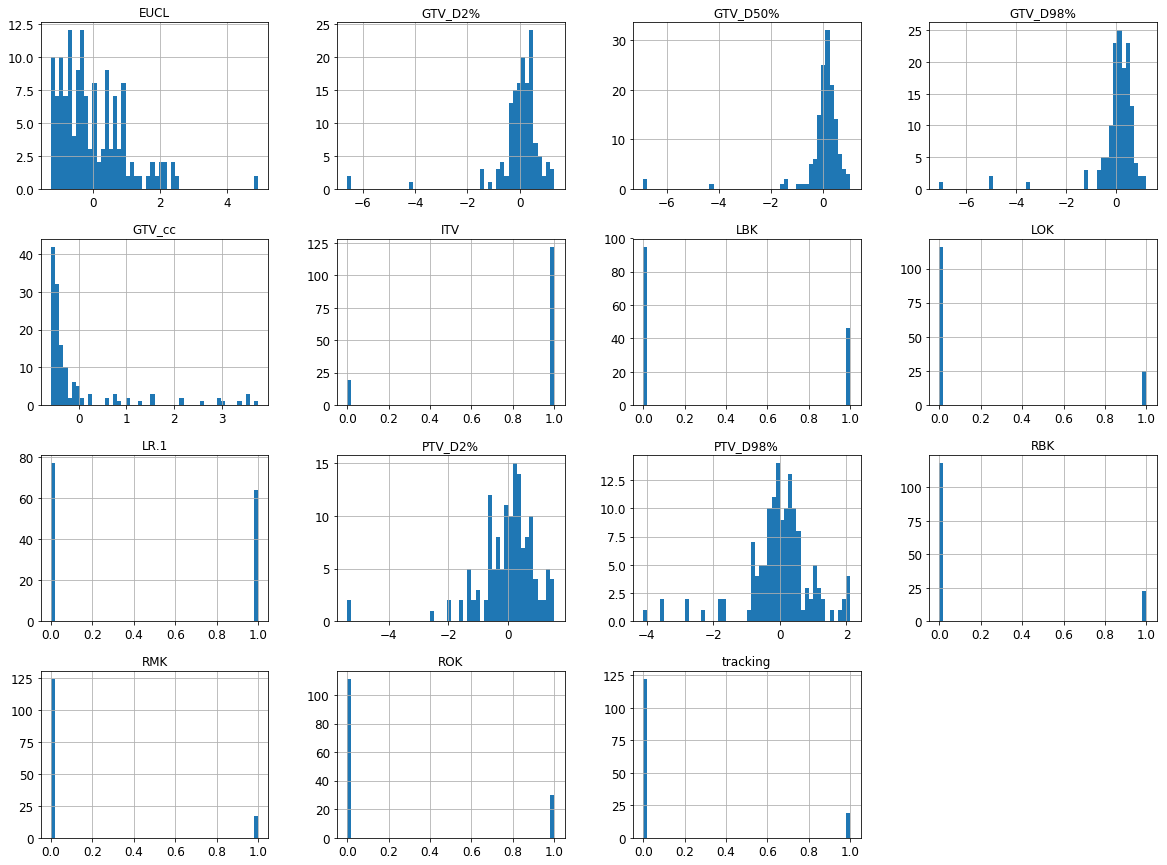

In [36]:
# To drop irrelevant features and change categorical features to binary features
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

onehot = OneHotEncoder(dtype=np.int, sparse=True)

nominals = pd.DataFrame(
    onehot.fit_transform(data[['Location_exact', 'Technique']])\
    .toarray(),
    columns=['LBK', 'LOK', 'RBK', 'RMK','ROK','ITV', 'tracking'])

data_encoded = data.drop(["Location_exact","Technique","AP","LR","CC","PTV_V50Gy"],axis=1)
data_encoded = nominals.join(data_encoded) 

# To standardize all continuous features
scaler = StandardScaler()
data_encoded["PTV_D98%"] = scaler.fit_transform(data_encoded["PTV_D98%"].values.reshape(-1,1))
data_encoded["PTV_D2%"] = scaler.fit_transform(data_encoded["PTV_D2%"].values.reshape(-1,1))
data_encoded["GTV_D2%"] = scaler.fit_transform(data_encoded["GTV_D2%"].values.reshape(-1,1))
data_encoded["GTV_D98%"] = scaler.fit_transform(data_encoded["GTV_D98%"].values.reshape(-1,1))
data_encoded["GTV_D50%"] = scaler.fit_transform(data_encoded["GTV_D50%"].values.reshape(-1,1))
data_encoded["GTV_cc"] = scaler.fit_transform(data_encoded["GTV_cc"].values.reshape(-1,1))
data_encoded["EUCL"] = scaler.fit_transform(data_encoded["EUCL"].values.reshape(-1,1))

%matplotlib inline
data_encoded.hist(bins=50, figsize=(20,15)) 
plt.show()

In [37]:
# To split using stratified sampling based on labels
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=42)

sss.get_n_splits(data_encoded, data_encoded["LR.1"])

for train_index, test_index in sss.split(data_encoded, data_encoded["LR.1"]):
        train = data_encoded.loc[train_index]
        test = data_encoded.loc[test_index]

In [38]:
# To split the features from the labels
train_features = train.drop("LR.1", axis=1)
train_labels = train["LR.1"].copy()

test_features = test.drop("LR.1", axis=1)
test_labels = test["LR.1"].copy()

train_features.head()

,LBK,LOK,RBK,RMK,ROK,ITV,tracking,PTV_D2%,PTV_D98%,GTV_D2%,GTV_D98%,GTV_D50%,GTV_cc,EUCL
101,0,0,1,0,0,1,0,0.347491,0.218024,0.217487,0.699669,0.479324,-0.424425,-0.675516
22,1,0,0,0,0,1,0,0.569259,1.247183,0.268503,0.237051,0.228080,2.143650,-0.356388
41,1,0,0,0,0,1,0,-0.206929,-0.225086,1.325648,0.449084,0.699929,-0.549455,-0.334148
15,1,0,0,0,0,1,0,-0.582970,-0.739666,-0.250151,0.208137,0.123906,-0.515030,0.315792
19,0,0,1,0,0,1,0,-1.074717,-0.301320,-0.675276,0.509321,-0.157978,-0.566392,-0.621572


Optimal number of features : 9
[ True  True  True  True  True False False False False  True  True  True
  True False]


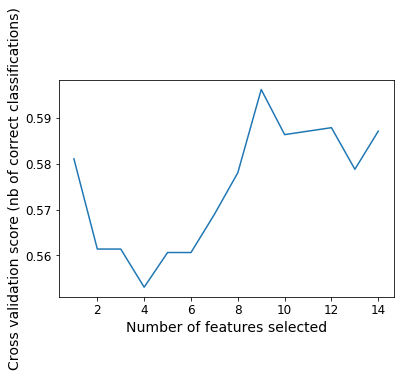

In [39]:
# To perform automatic cross-validation recursive feature selection on the training set

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(5),
              scoring='accuracy')
rfecv.fit(train_features, train_labels)

print("Optimal number of features : %d" % rfecv.n_features_)
print(rfecv.support_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [40]:
# To split the features from the labels
train_features = train_features.drop(['LBK','LOK','RBK','RMK','ROK','PTV_D2%','GTV_D2%'], axis=1)
test_features = test_features.drop(['LBK','LOK','RBK','RMK','ROK','PTV_D2%','GTV_D2%'], axis=1)

train_features.head()

,ITV,tracking,PTV_D98%,GTV_D98%,GTV_D50%,GTV_cc,EUCL
101,1,0,0.218024,0.699669,0.479324,-0.424425,-0.675516
22,1,0,1.247183,0.237051,0.228080,2.143650,-0.356388
41,1,0,-0.225086,0.449084,0.699929,-0.549455,-0.334148
15,1,0,-0.739666,0.208137,0.123906,-0.515030,0.315792
19,1,0,-0.301320,0.509321,-0.157978,-0.566392,-0.621572


Optimal number of features : 5
[False False  True  True  True  True  True]


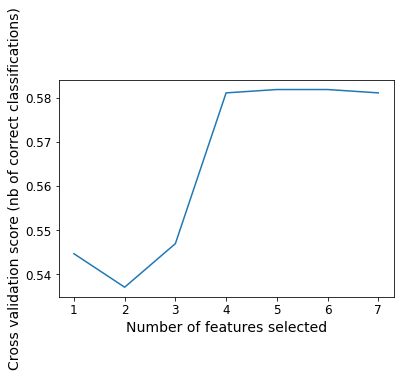

In [41]:
# To perform automatic cross-validation recursive feature selection on the training set

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(5),
              scoring='accuracy')
rfecv.fit(train_features, train_labels)

print("Optimal number of features : %d" % rfecv.n_features_)
print(rfecv.support_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [42]:
train_features_forfit = train_features.filter(["GTV_cc", "GTV_D50%"],axis=1)
test_features_forfit = test_features.filter(["GTV_cc", "GTV_D50%"],axis=1)

train_features_forfit.head()

,GTV_cc,GTV_D50%
101,-0.424425,0.479324
22,2.143650,0.228080
41,-0.549455,0.699929
15,-0.515030,0.123906
19,-0.566392,-0.157978


In [43]:
# To select and train the linear SVC (Support-Vector classification)

from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(train_features_forfit, train_labels) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
from sklearn.metrics import classification_report

predictions_train = clf.predict(train_features_forfit)
print(classification_report(train_labels, predictions_train))

predictions_test = clf.predict(test_features_forfit)
print(classification_report(test_labels, predictions_test))

              precision    recall  f1-score   support

           0       0.58      0.92      0.71        61
           1       0.69      0.22      0.33        51

   micro avg       0.60      0.60      0.60       112
   macro avg       0.64      0.57      0.52       112
weighted avg       0.63      0.60      0.54       112

              precision    recall  f1-score   support

           0       0.54      0.88      0.67        16
           1       0.33      0.08      0.12        13

   micro avg       0.52      0.52      0.52        29
   macro avg       0.44      0.48      0.40        29
weighted avg       0.45      0.52      0.42        29

